In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
x_train = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0]).reshape(-1, 1)
y_train = np.array([300.0, 400.0, 500.0, 600.0, 700.0, 800.00])
print(f"x_train = {x_train},\ny_train = {y_train}")

x_train = [[1.]
 [2.]
 [3.]
 [4.]
 [5.]
 [6.]],
y_train = [300. 400. 500. 600. 700. 800.]


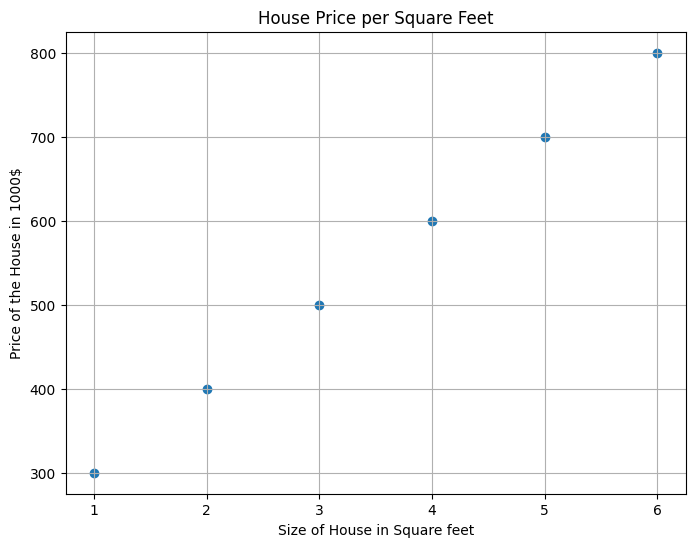

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(x_train, y_train, marker='o', colorizer='g')
plt.xlabel("Size of House in Square feet")
plt.ylabel("Price of the House in 1000$")
plt.title("House Price per Square Feet")
plt.grid()
plt.show()

In [6]:
print(f"Number of samples in x_train: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training samples: {m}")

Number of samples in x_train: (6, 1)
Number of training samples: 6


In [7]:
# Define Initial weights and bias

# Guess weight and bias to best fit our model
# w = 100
# b = 200

weight = np.array([0]).astype(float)
bias = 0

In [250]:
def compute_model(X, w, b):
    return np.dot(X, w) + b

In [251]:
y_predict = compute_model(x_train.reshape(-1,1), weight, bias)
print(y_predict)

[0. 0. 0. 0. 0. 0.]


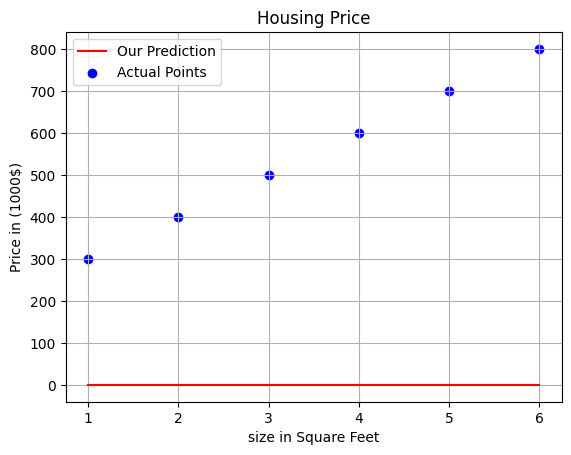

In [252]:
# Plot our model prediction
plt.plot(x_train, y_predict, color='red', label="Our Prediction")

# plot the data points
plt.scatter(x_train, y_train, color="blue", label="Actual Points")

# set the text
plt.xlabel("size in Square Feet")
plt.ylabel("Price in (1000$)")
plt.title("Housing Price")
plt.legend()
plt.grid()
plt.show()


In [253]:
def compute_loss(y_actual, y_predict):
    return np.mean((y_actual - y_predict) ** 2) 

In [254]:
def compute_loss_gradient(n, y_actual, y_predict):
    return -2 * (y_actual - y_predict) / n

In [271]:
# define number of iterations to do back propagation 
epochs = 10000
learning_rate = 0.01
n = x_train.shape[0]

losses = []
for epoch in range(epochs):
    y_predict = compute_model(x_train, weight, bias)
    loss = compute_loss(y_train, y_predict)
    losses.append(loss)

    # compute Gradients
    dL_dy = compute_loss_gradient(n, y_train, y_predict)
    dy_dz = 1
    dz_dw = x_train
    dz_db = 1
    
    # compute weight and bias using chain rule
    dL_dw = np.dot(dL_dy, dz_dw)
    dL_db = np.sum(dL_dy * dz_db)

    # update weight and bias
    weight -= learning_rate * dL_dw
    bias -= learning_rate * dL_db

    if epoch % 1000 == 0:
        print(f"Epoch: {epoch}, Loss: {loss:.2f}")

# Print final weight and bias
print(f"Final Weight: {weight}, Final Bias: {bias:2f}")

# After training, compute final predictions
y_predicted = compute_model(x_train, weight, bias)

Epoch: 0, Loss: 0.00
Epoch: 1000, Loss: 0.00
Epoch: 2000, Loss: 0.00
Epoch: 3000, Loss: 0.00
Epoch: 4000, Loss: 0.00
Epoch: 5000, Loss: 0.00
Epoch: 6000, Loss: 0.00
Epoch: 7000, Loss: 0.00
Epoch: 8000, Loss: 0.00
Epoch: 9000, Loss: 0.00
Final Weight: [100.], Final Bias: 200.000000


In [272]:
print("Training Predictions:")
for x, y_actual, y_pred in zip(x_train.flatten(), y_train, y_predicted):
    print(f"Input: {x}, Actual: {y_actual:.2f}, Predicted: {y_pred:.2f}")

Training Predictions:
Input: 1.0, Actual: 300.00, Predicted: 300.00
Input: 2.0, Actual: 400.00, Predicted: 400.00
Input: 3.0, Actual: 500.00, Predicted: 500.00
Input: 4.0, Actual: 600.00, Predicted: 600.00
Input: 5.0, Actual: 700.00, Predicted: 700.00
Input: 6.0, Actual: 800.00, Predicted: 800.00


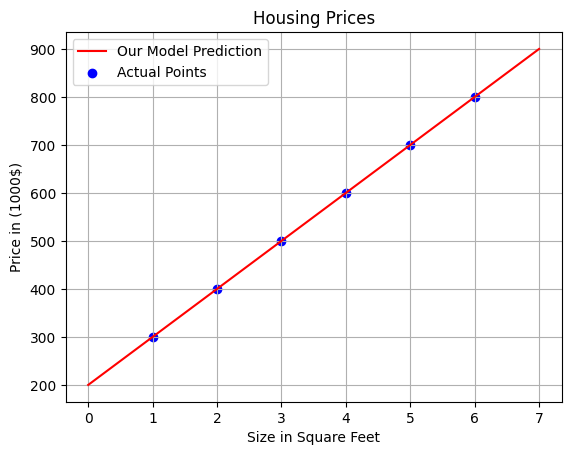

In [273]:
# Generate x1 values for the decision boundary (extend range slightly)
x1 = np.linspace(x_train.min() - 1, x_train.max() + 1, 100)

# Calculate x2 (predicted dependent variable) using the model equation
x2 = weight * x1 + bias

# Plot the decision boundary
plt.plot(x1, x2, color='red', label='Our Model Prediction')

# Plot the data points
plt.scatter(x_train, y_train, color='blue', marker='o', label='Actual Points')

# Set title and labels
plt.title("Housing Prices")
plt.xlabel("Size in Square Feet")
plt.ylabel("Price in (1000$)")

# Add legend and grid
plt.legend()
plt.grid()

# Show the plot
plt.show()

In [274]:
def mean_absolute_error(y_actual, y_predicted):
    n = len(y_actual)
    total_error = sum(abs(actual - predicted) for actual, predicted in zip(y_actual, y_predicted))
    return total_error / n

In [275]:
def mean_squared_error(y_actual, y_predicted):
    n = len(y_actual)
    total_error = sum((actual - predicted) ** 2 for actual, predicted in zip(y_actual, y_predicted))
    return total_error / n

In [276]:
def root_mean_squared_error(y_actual, y_predicted):
    mse = mean_squared_error(y_actual, y_predicted)
    return mse ** 0.5

In [277]:
def mean_absolute_percentage_error(y_actual, y_predicted):
    n = len(y_actual)
    total_error = sum(abs((actual - predicted) / actual) for actual, predicted in zip(y_actual, y_predicted) if actual != 0)
    return (total_error / n) * 100

In [278]:
def r2_score(y_actual, y_predicted):
    mean_y_actual = sum(y_actual) / len(y_actual)
    ss_total = sum((actual - mean_y_actual) ** 2 for actual in y_actual)
    ss_residual = sum((actual - predicted) ** 2 for actual, predicted in zip(y_actual, y_predicted))
    return 1 - (ss_residual / ss_total)

In [279]:
def adjusted_r2_score(y_actual, y_predicted, num_features):
    n = len(y_actual)
    r2 = r2_score(y_actual, y_predicted)
    return 1 - (1 - r2) * (n - 1) / (n - num_features - 1)

In [280]:
def total_sum_of_squares(y_actual):
    mean_y_actual = sum(y_actual) / len(y_actual)
    return sum((actual - mean_y_actual) ** 2 for actual in y_actual)

def explained_sum_of_squares(y_actual, y_predicted):
    mean_y_actual = sum(y_actual) / len(y_actual)
    return sum((predicted - mean_y_actual) ** 2 for predicted in y_predicted)

def residual_sum_of_squares(y_actual, y_predicted):
    return sum((actual - predicted) ** 2 for actual, predicted in zip(y_actual, y_predicted))

In [281]:
y_actual = y_train

# Calculate metrics
print("MAE:", mean_absolute_error(y_actual, y_predicted))
print("MSE:", mean_squared_error(y_actual, y_predicted))
print("RMSE:", root_mean_squared_error(y_actual, y_predicted))
print("MAPE:", mean_absolute_percentage_error(y_actual, y_predicted))
print("R² Score:", r2_score(y_actual, y_predicted))
print("Adjusted R²:", adjusted_r2_score(y_actual, y_predicted, num_features=1))

# Error Metrics
print("TSS:", total_sum_of_squares(y_actual))
print("ESS:", explained_sum_of_squares(y_actual, y_predicted))
print("RSS:", residual_sum_of_squares(y_actual, y_predicted))

MAE: 1.4968766966679443e-12
MSE: 3.1342390397517064e-24
RMSE: 1.7703782194072842e-12
MAPE: 3.5651199805359944e-13
R² Score: 1.0
Adjusted R²: 1.0
TSS: 175000.0
ESS: 175000.00000000332
RSS: 1.880543423851024e-23


In [268]:
x_test = np.array([7.0, 8.0, 8.5, 9.0, 9.9, 10.0]).reshape(-1, 1)

# Actual outputs for the test data
y_test = 100 * x_test.flatten() + 200 

# Make predictions using the trained model
y_pred_test = compute_model(x_test, weight, bias)

print("Test Predictions:")
for x, y_actual, y_pred in zip(x_test.flatten(), y_test, y_pred_test):
    print(f"Input: {x}, Actual: {y_actual:.2f}, Predicted: {y_pred:.2f}")

# Evaluate performance on test data
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("\nTest Data Performance:")
print(f"MAE: {mae_test:.2f}")
print(f"MSE: {mse_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R² Score: {r2_test:.2f}")

Test Predictions:
Input: 7.0, Actual: 900.00, Predicted: 900.00
Input: 8.0, Actual: 1000.00, Predicted: 1000.00
Input: 8.5, Actual: 1050.00, Predicted: 1050.00
Input: 9.0, Actual: 1100.00, Predicted: 1100.00
Input: 9.9, Actual: 1190.00, Predicted: 1190.00
Input: 10.0, Actual: 1200.00, Predicted: 1200.00

Test Data Performance:
MAE: 0.00
MSE: 0.00
RMSE: 0.00
R² Score: 1.00
